In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [7]:
# Load the dataset
data = pd.read_csv('/assets/climate_data_re.csv')
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.set_index('Date', inplace=True)

In [8]:
# Select the feature to model (e.g., Temperature)
data = data[['Temperature']]

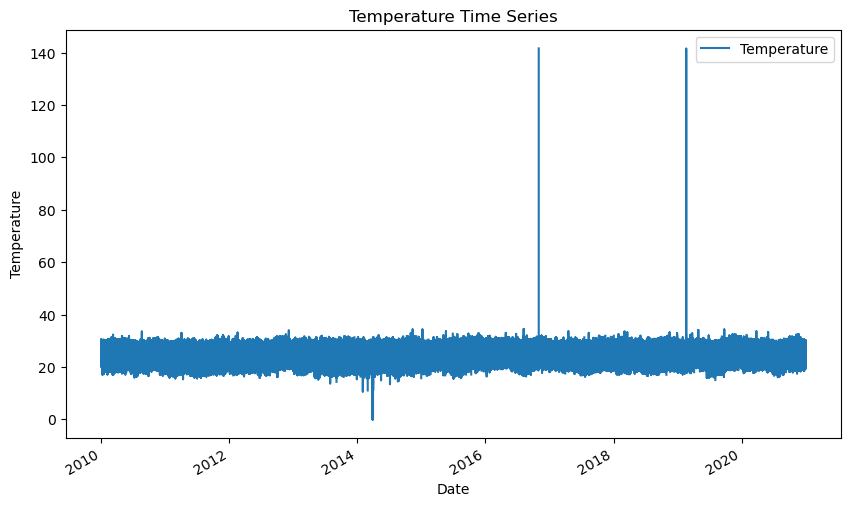

In [9]:
# Plot the data
data.plot(figsize=(10, 6), title='Temperature Time Series', xlabel='Date', ylabel='Temperature')
plt.show()

In [10]:
# Split into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [11]:
# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust p, d, q based on data analysis
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())

C:\Users\samue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samue\anaconda3\lib\site-

                               SARIMAX Results                                
Dep. Variable:            Temperature   No. Observations:               471412
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -568203.823
Date:                Tue, 03 Dec 2024   AIC                        1136419.645
Time:                        21:18:15   BIC                        1136486.026
Sample:                             0   HQIC                       1136438.483
                             - 471412                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5806      0.000  -5682.866      0.000      -0.581      -0.580
ar.L2         -0.4250      0.000  -1548.896      0.000      -0.426      -0.424
ar.L3         -0.3155      0.000   -808.774      0.0

In [12]:
# Forecast
forecast = fitted_model.forecast(steps=len(test))
forecast.index = test.index

C:\Users\samue\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [13]:
# Evaluate the model
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")

# Plot the forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show() 

ValueError: Input contains NaN.